In [132]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [133]:
df=pd.read_csv("data.csv")

In [134]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [135]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [137]:
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df[df['Year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly_dark',  # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

In [138]:
column_name = 'Access to electricity (% of population)'
plot_world_map(column_name)

In [139]:
column_name = 'Access to clean fuels for cooking'
plot_world_map(column_name)

In [140]:
#Rows
df.shape[0]

3649

In [141]:
#coloums
df.shape[1]

21

In [142]:
for col in df.columns:
    print(col,":",df[col].nunique())

Entity : 176
Year : 21
Access to electricity (% of population) : 2040
Access to clean fuels for cooking : 896
Renewable-electricity-generating-capacity-per-capita : 2110
Financial flows to developing countries (US $) : 1017
Renewable energy share in the total final energy consumption (%) : 2587
Electricity from fossil fuels (TWh) : 1859
Electricity from nuclear (TWh) : 547
Electricity from renewables (TWh) : 1533
Low-carbon electricity (% electricity) : 2647
Primary energy consumption per capita (kWh/person) : 3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP) : 1044
Value_co2_emissions_kt_by_country : 2397
Renewables (% equivalent primary energy) : 1455
gdp_growth : 3320
gdp_per_capita : 3367
Density\n(P/Km2) : 124
Land Area(Km2) : 175
Latitude : 175
Longitude : 175


In [143]:
# Filtering numerical data
numeric_data = df.select_dtypes(include='number')

In [144]:
numeric_data.columns

Index(['Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [145]:
# Filtering categorical data
categorical_data = df.select_dtypes(exclude='number')

In [146]:
categorical_data

,Entity,Density\n(P/Km2)
0,Afghanistan,60
1,Afghanistan,60
2,Afghanistan,60
3,Afghanistan,60
4,Afghanistan,60
...,...,...
3644,Zimbabwe,38
3645,Zimbabwe,38
3646,Zimbabwe,38
3647,Zimbabwe,38


In [147]:
categorical_data.columns

Index(['Entity', 'Density\n(P/Km2)'], dtype='object')

In [148]:
# Describe dataset and show missing values
df_info = df.describe().transpose()
missing_values = df.isna().sum()

In [149]:
missing_values

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [150]:
df_info

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


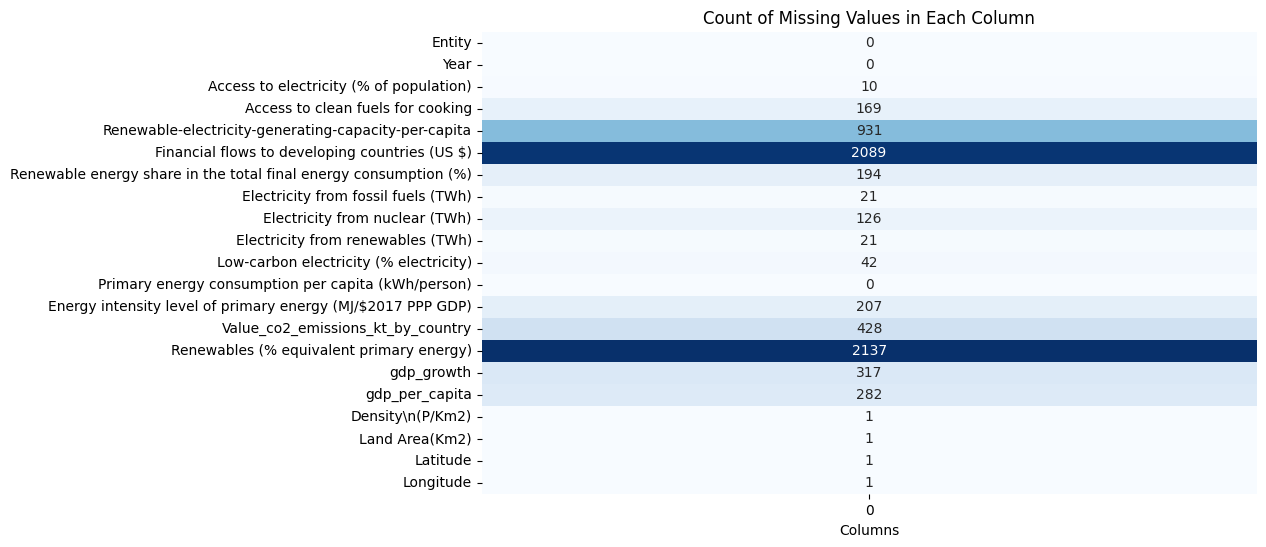

In [151]:
# Create a heatmap
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
# Customize the chart
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')
# Display the chart
plt.show()

In [152]:
# Drop columns with a high number of missing values
df.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [153]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [154]:
# Fill missing values with mean
columns_to_fill_mean = ['Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from nuclear (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                        'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita']
df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

In [155]:
df.isna().sum()

Entity                                                               0
Year                                                                 0
Access to electricity (% of population)                             10
Access to clean fuels for cooking                                    0
Renewable energy share in the total final energy consumption (%)     0
Electricity from fossil fuels (TWh)                                 21
Electricity from nuclear (TWh)                                       0
Electricity from renewables (TWh)                                   21
Low-carbon electricity (% electricity)                              42
Primary energy consumption per capita (kWh/person)                   0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          0
Value_co2_emissions_kt_by_country                                    0
gdp_growth                                                           0
gdp_per_capita                                                       0
Densit

In [156]:
# Drop remaining rows with missing values
df = df.dropna()

In [157]:
df.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n(P/Km2)    

In [158]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [159]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix
print(correlation_matrix)

                                                        Year  \
Year                                                1.000000   
Access to electricity (% of population)             0.125712   
Access to clean fuels for cooking                   0.064450   
Renewable energy share in the total final energ... -0.023255   
Electricity from fossil fuels (TWh)                 0.032060   
Electricity from nuclear (TWh)                     -0.005461   
Electricity from renewables (TWh)                   0.073513   
Low-carbon electricity (% electricity)              0.026373   
Primary energy consumption per capita (kWh/person)  0.001562   
Energy intensity level of primary energy (MJ/$2... -0.146092   
Value_co2_emissions_kt_by_country                   0.021141   
gdp_growth                                         -0.187968   
gdp_per_capita                                      0.131025   
Land Area(Km2)                                     -0.002763   
Latitude                                

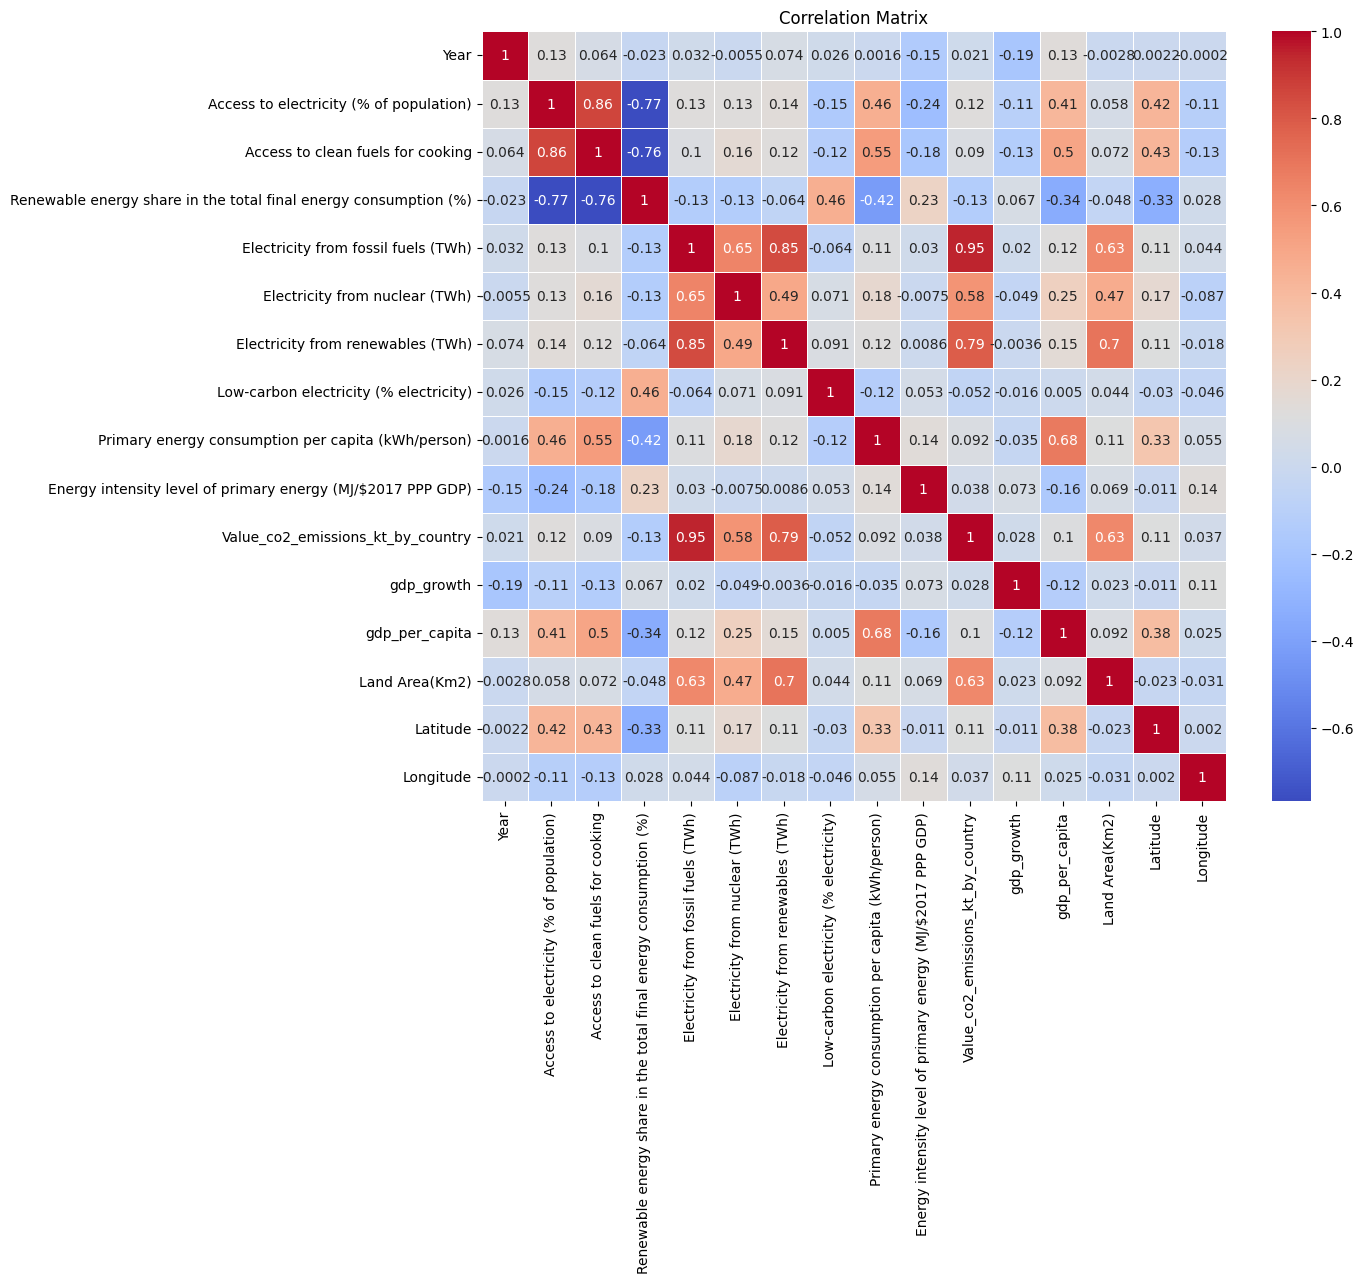

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()


In [161]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set a threshold for correlation
threshold = 0.8

# Find highly correlated pairs
highly_correlated_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            pair = (colname, colname2, correlation_matrix.iloc[i, j])
            highly_correlated_pairs.add(pair)

# Display highly correlated pairs
print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]} : {pair[2]}")


Highly correlated pairs:
Value_co2_emissions_kt_by_country and Electricity from fossil fuels (TWh) : 0.9489463403001924
Access to clean fuels for cooking and Access to electricity (% of population) : 0.862059475467042
Electricity from renewables (TWh) and Electricity from fossil fuels (TWh) : 0.8450076470762783


In [162]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


Text(0, 0.5, 'Electricity Access (% Population)')

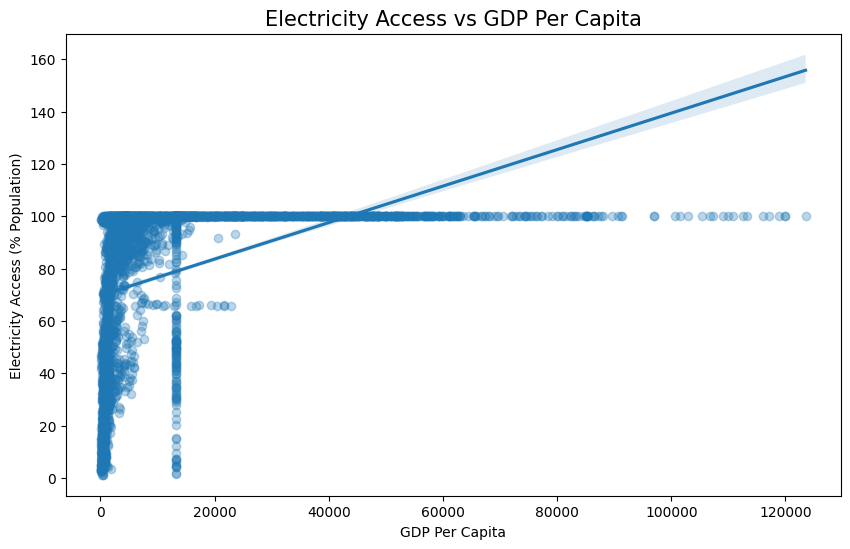

In [163]:
plt.figure(figsize=(10,6))
sns.regplot(x='gdp_per_capita', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Electricity Access vs GDP Per Capita', size=15)
plt.xlabel('GDP Per Capita')
plt.ylabel('Electricity Access (% Population)')

Text(0, 0.5, 'Renewable Share (%)')

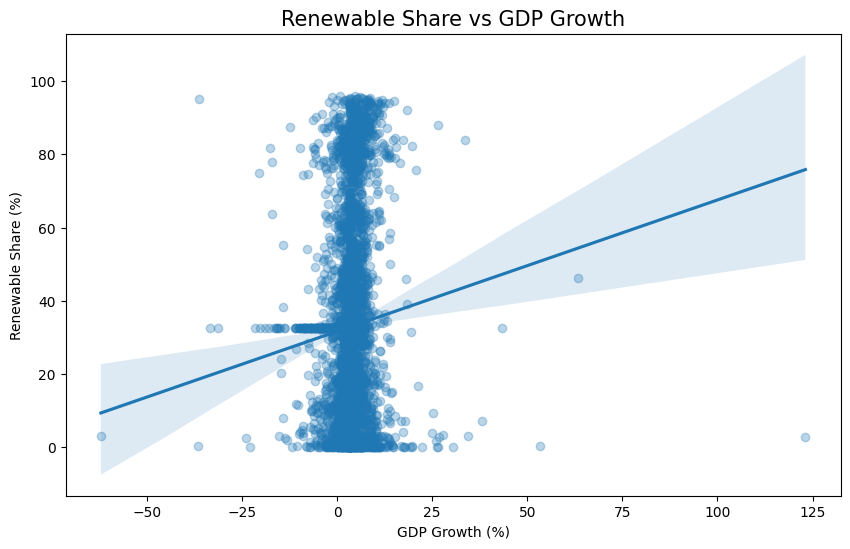

In [164]:
plt.figure(figsize=(10,6))
sns.regplot(x='gdp_growth', y='Renewable energy share in the total final energy consumption (%)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs GDP Growth', size=15)
plt.xlabel('GDP Growth (%)')
plt.ylabel('Renewable Share (%)')

Text(0, 0.5, 'Electricity Access (% Population)')

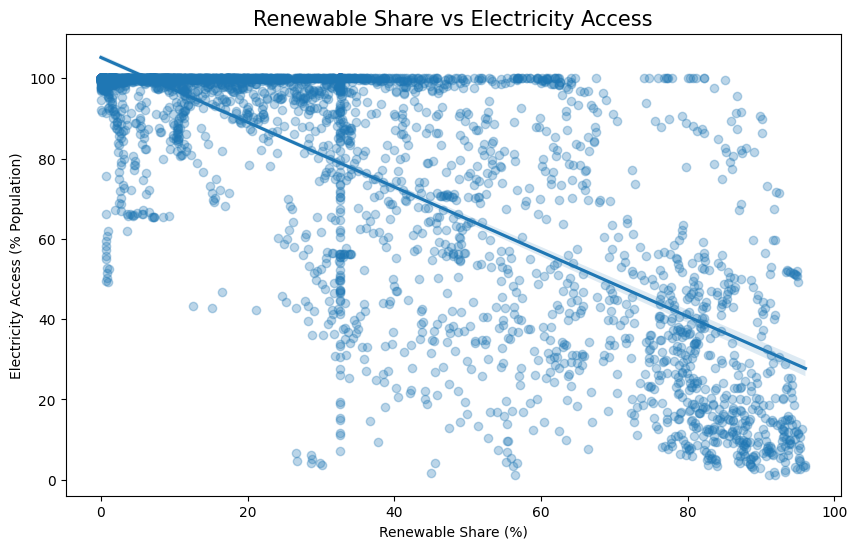

In [165]:
plt.figure(figsize=(10,6))
sns.regplot(x='Renewable energy share in the total final energy consumption (%)', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs Electricity Access', size=15)
plt.xlabel('Renewable Share (%)')
plt.ylabel('Electricity Access (% Population)')

Text(0, 0.5, 'Electricity Access (% Population)')

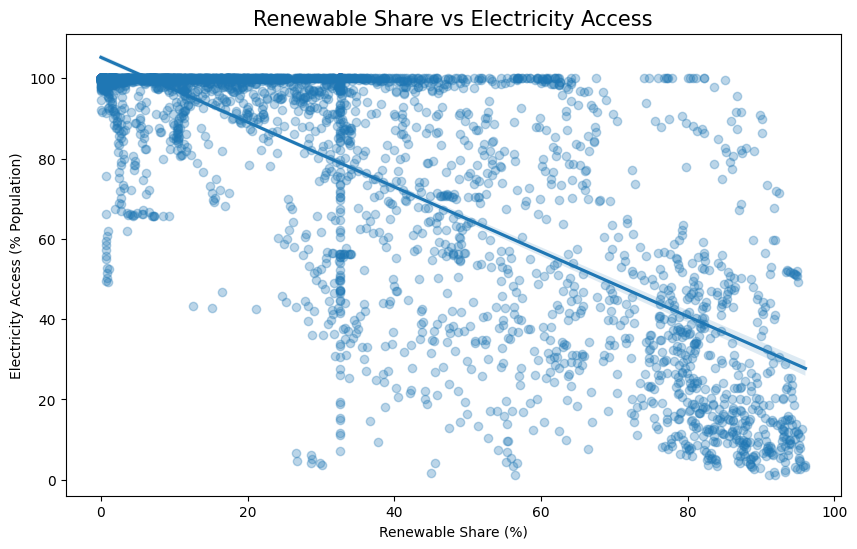

In [166]:
plt.figure(figsize=(10,6))
sns.regplot(x='Renewable energy share in the total final energy consumption (%)', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs Electricity Access', size=15)
plt.xlabel('Renewable Share (%)')
plt.ylabel('Electricity Access (% Population)')

Text(0, 0.5, 'Renewable Share (%)')

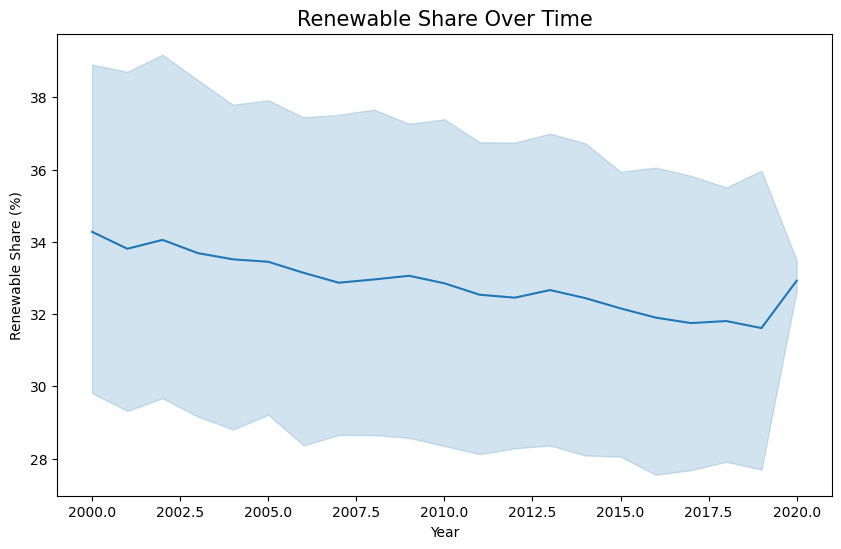

In [167]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Renewable energy share in the total final energy consumption (%)', data=df)
plt.title('Renewable Share Over Time', size=15)
plt.xlabel('Year')
plt.ylabel('Renewable Share (%)')

In [168]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [169]:
# Define the ModelComparisonPlot class
class ModelComparisonPlot:
    def __init__(self, model_name):
        self.model_name = model_name
    
    def plot_comparison(self, y_val, y_pred, mse, mae, r2):
        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(11, 5))

        # Plot the predicted vs true values
        sns.regplot(x=y_val, y=y_pred, color='blue', scatter_kws={'alpha':0.5}, ax=axes[0])
        axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
        axes[0].set_xlabel('True values', fontsize=12)
        axes[0].set_ylabel('Predicted values', fontsize=12)
        axes[0].set_title('Predicted vs true values')
        axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

        # Plot the residuals vs predicted values
        residuals = y_val - y_pred
        sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5}, ax=axes[1])
        axes[1].plot([y_val.min(), y_val.max()], [0, 0], 'k--', lw=2)
        axes[1].set_xlabel('Predicted values', fontsize=12)
        axes[1].set_ylabel('Residuals', fontsize=12)
        axes[1].set_title('Residual plot', fontsize=15)
        axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

        # Add a title to the figure
        fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(self.model_name), fontsize=15)

        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.4)

        # Display the figure with the title
        plt.show()

In [170]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [171]:
df = df.rename(columns = {"Density\\n(P/Km2)":"Density (P/km2)",
                  "Value_co2_emissions_kt_by_country":"CO2 emissions value by country (kT)",
                  "Access to clean fuels for cooking":"Access to clean fuels for cooking (% of population)",
                  "gdp_growth":"GDP growth",
                  "gdp_per_capita":"GDP per capita",
                  "Renewable-electricity-generating-capacity-per-capita":"Renewable electricity Generating Capacity per capita"
                  })

In [172]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking (% of population)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'CO2 emissions value by country (kT)', 'GDP growth', 'GDP per capita',
       'Density (P/km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [173]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking (% of population)                 float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
CO2 emissions value by country (kT)                                 float64
GDP growth                                                          float64
GDP per capi

In [174]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [175]:
df['Density (P/km2)'] = df['Density (P/km2)'].str.replace(',', '')


In [176]:
df['Density (P/km2)'] = pd.to_numeric(df['Density (P/km2)'])

In [177]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking (% of population)                 float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
CO2 emissions value by country (kT)                                 float64
GDP growth                                                          float64
GDP per capi

In [178]:
df = df.drop(columns = ['Latitude', 'Longitude']) \
    .copy()

In [179]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60,652230.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60,652230.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60,652230.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0
3645,Zimbabwe,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0
3646,Zimbabwe,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0
3647,Zimbabwe,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38,390757.0


In [180]:
average_co2_emission_by_country = df.groupby('Entity')['CO2 emissions value by country (kT)'].mean()

In [181]:
top_5_countries = average_co2_emission_by_country.nlargest(5)

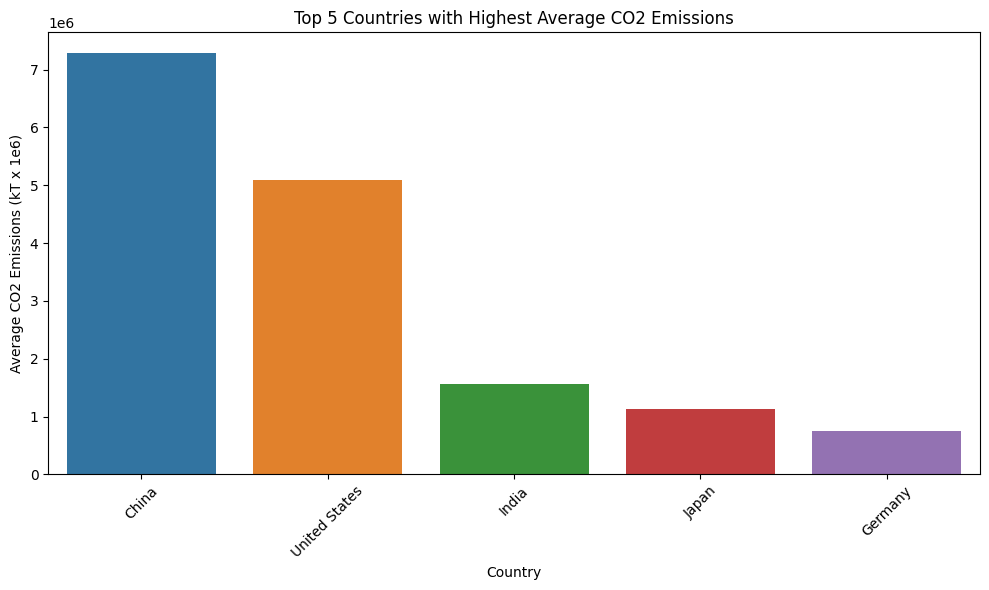

In [182]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_5_countries.index, y = top_5_countries.values)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (kT x 1e6)')
plt.title('Top 5 Countries with Highest Average CO2 Emissions')

plt.xticks(rotation = 45, ha = 'center')

plt.tight_layout()
plt.show()

In [183]:
top_5_lowest_emissions = average_co2_emission_by_country.nsmallest(5)


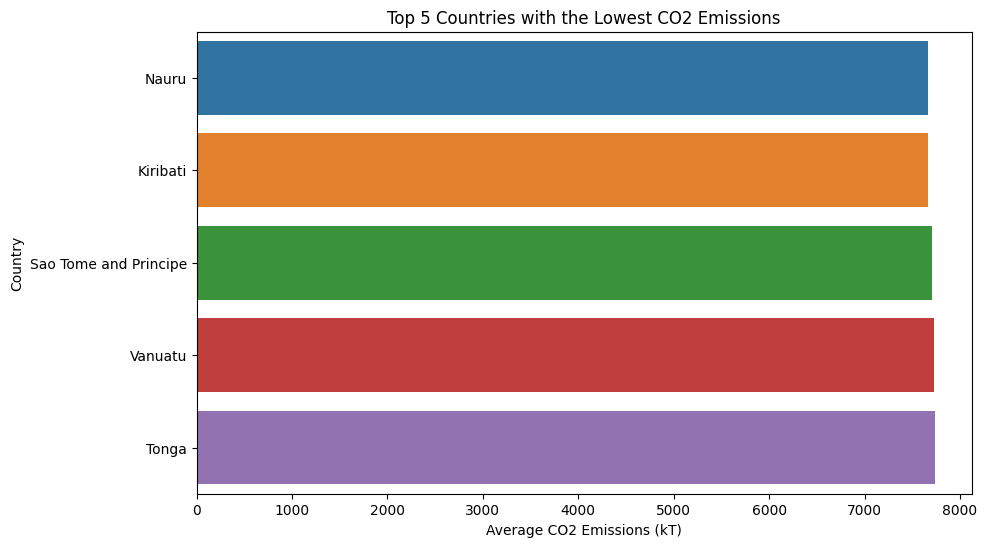

In [184]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_5_lowest_emissions.values, y = top_5_lowest_emissions.index)
plt.xlabel('Average CO2 Emissions (kT)')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Lowest CO2 Emissions')

plt.show()

In [185]:
average_co2_by_year = df.groupby('Year')['CO2 emissions value by country (kT)'].mean()
average_co2_by_year = average_co2_by_year.reset_index()

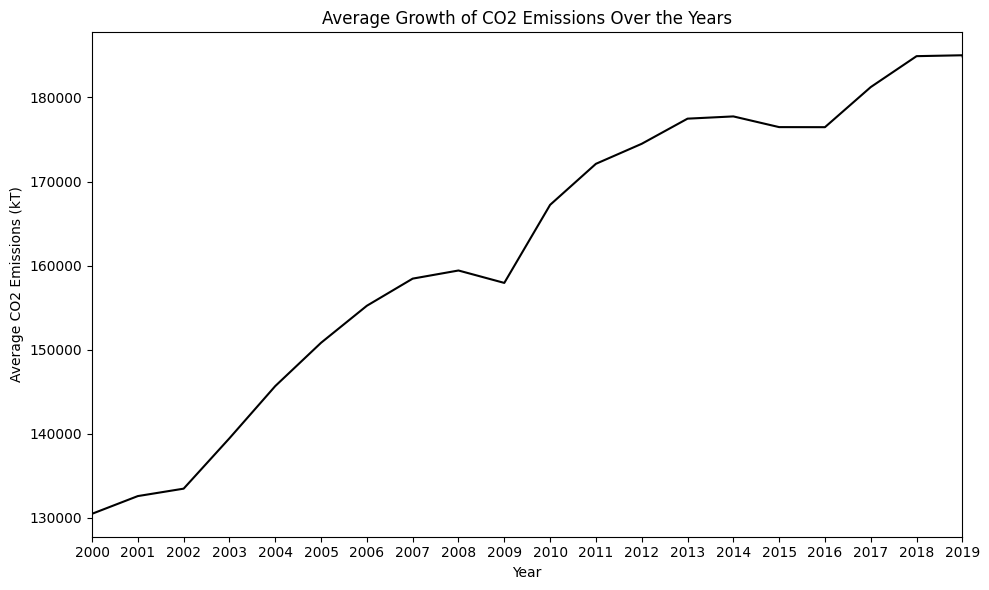

In [186]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = average_co2_by_year, x = 'Year', y = 'CO2 emissions value by country (kT)', color = 'black')
plt.title('Average Growth of CO2 Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (kT)')

plt.xticks(average_co2_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019) #2020 doesn't containt data and will be predicted later

plt.tight_layout()
plt.show()

In [187]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60,652230.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60,652230.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60,652230.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0
3645,Zimbabwe,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0
3646,Zimbabwe,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0
3647,Zimbabwe,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38,390757.0


In [188]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking (% of population)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'CO2 emissions value by country (kT)', 'GDP growth', 'GDP per capita',
       'Density (P/km2)', 'Land Area(Km2)'],
      dtype='object')

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [190]:
# For simplicity, let's use the previous year's CO2 emissions as a feature
df['Previous_CO2_emissions'] = df.groupby('Entity')['CO2 emissions value by country (kT)'].shift(1)

In [191]:
# Drop rows with missing values introduced by the shift operation
df = df.dropna()

In [192]:
# Split the data into features (X) and target variable (y)
X = df[['Access to electricity (% of population)', 'Access to clean fuels for cooking (% of population)',
        'Renewable energy share in the total final energy consumption (%)',
        'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
        'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
        'Primary energy consumption per capita (kWh/person)',
        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
        'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)', 'Previous_CO2_emissions']]

In [193]:
y = df['CO2 emissions value by country (kT)']


In [194]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
# Choose and train a model (Linear Regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [196]:
# Make predictions on the test set
predictions = model.predict(X_test)


In [197]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 41128.37781358886


In [198]:
# Make predictions for the next year using the latest available data
latest_data = df.groupby('Entity').last().reset_index()
latest_year_features = latest_data[['Access to electricity (% of population)', 'Access to clean fuels for cooking (% of population)',
                                    'Renewable energy share in the total final energy consumption (%)',
                                    'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                                    'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                                    'Primary energy consumption per capita (kWh/person)',
                                    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                                    'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)', 'Previous_CO2_emissions']]

In [199]:
next_year_prediction = model.predict(latest_year_features)

In [200]:
print(f'Predicted CO2 emissions for the next year: {next_year_prediction[0]}')

Predicted CO2 emissions for the next year: 34073.629953487325


In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Feature engineering (if needed)
# For simplicity, let's use the previous year's CO2 emissions as a feature
df['Previous_CO2_emissions'] = df.groupby('Entity')['CO2 emissions value by country (kT)'].shift(1)

# Drop rows with missing values introduced by the shift operation
df = df.dropna()

# Initialize a dictionary to store predictions for each country
predictions_dict = {'Entity': [], 'Predicted_CO2_emissions_next_year': []}

# Iterate over each country
for country in df['Entity'].unique():
    # Subset data for the current country
    country_data = df[df['Entity'] == country]

    # Extract features for the current country
    X = country_data[['Access to electricity (% of population)', 'Access to clean fuels for cooking (% of population)',
                      'Renewable energy share in the total final energy consumption (%)',
                      'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                      'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                      'Primary energy consumption per capita (kWh/person)',
                      'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                      'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)', 'Previous_CO2_emissions']]

    y = country_data['CO2 emissions value by country (kT)']

    # Train a model for the current country
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions for the next year using the latest available data
    latest_data = country_data.groupby('Entity').last().reset_index()
    latest_year_features = latest_data[['Access to electricity (% of population)',
                                        'Access to clean fuels for cooking (% of population)',
                                        'Renewable energy share in the total final energy consumption (%)',
                                        'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                                        'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                                        'Primary energy consumption per capita (kWh/person)',
                                        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                                        'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)',
                                        'Previous_CO2_emissions']]

    next_year_prediction = model.predict(latest_year_features)

    # Store the results in the dictionary
    predictions_dict['Entity'].append(country)
    predictions_dict['Predicted_CO2_emissions_next_year'].append(next_year_prediction[0])

# Create a DataFrame from the predictions dictionary
predictions_df = pd.DataFrame(predictions_dict)

# Display the results
print(predictions_df)


C:\Users\sitar\AppData\Local\Temp\ipykernel_26400\2670820093.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                  Entity  Predicted_CO2_emissions_next_year
0            Afghanistan                      159016.202976
1                Albania                      158535.137957
2                Algeria                      159865.369840
3                 Angola                      157442.381396
4    Antigua and Barbuda                      159853.559832
..                   ...                                ...
168           Uzbekistan                      159738.037214
169              Vanuatu                      152561.036858
170                Yemen                      159866.462686
171               Zambia                      159760.782187
172             Zimbabwe                       87596.870972

[173 rows x 2 columns]


In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your data
#df = pd.read_csv('your_data.csv')

# Feature engineering (if needed)
# For simplicity, let's use the previous year's CO2 emissions as a feature
df['Previous_CO2_emissions'] = df.groupby('Entity')['CO2 emissions value by country (kT)'].shift(1)

# Drop rows with missing values introduced by the shift operation
df = df.dropna()

# Initialize a dictionary to store predictions for each country and each year
predictions_dict = {'Entity': [], 'Year': [], 'Predicted_CO2_emissions': []}

# Iterate over each country
for country in df['Entity'].unique():
    # Subset data for the current country
    country_data = df[df['Entity'] == country]

    # Iterate over the next five years
    for year in range(1, 6):
        # Extract features for the current country and year
        X = country_data[['Access to electricity (% of population)', 'Access to clean fuels for cooking (% of population)',
                          'Renewable energy share in the total final energy consumption (%)',
                          'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                          'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                          'Primary energy consumption per capita (kWh/person)',
                          'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                          'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)', 'Previous_CO2_emissions']]

        y = country_data['CO2 emissions value by country (kT)']

        # Train a model for the current country and year
        model = LinearRegression()
        model.fit(X, y)

        # Make predictions for the next year using the latest available data
        latest_data = country_data.groupby('Entity').last().reset_index()
        latest_year_features = latest_data[['Access to electricity (% of population)',
                                            'Access to clean fuels for cooking (% of population)',
                                            'Renewable energy share in the total final energy consumption (%)',
                                            'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                                            'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                                            'Primary energy consumption per capita (kWh/person)',
                                            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                                            'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)',
                                            'Previous_CO2_emissions']]

        next_year_prediction = model.predict(latest_year_features)

        # Store the results in the dictionary
        predictions_dict['Entity'].append(country)
        predictions_dict['Year'].append(latest_data['Year'].values[0] + year)
        predictions_dict['Predicted_CO2_emissions'].append(next_year_prediction[0])

# Create a DataFrame from the predictions dictionary
predictions_df = pd.DataFrame(predictions_dict)

# Display the results
print(predictions_df)


          Entity  Year  Predicted_CO2_emissions
0    Afghanistan  2021            159029.769579
1    Afghanistan  2022            159029.769579
2    Afghanistan  2023            159029.769579
3    Afghanistan  2024            159029.769579
4    Afghanistan  2025            159029.769579
..           ...   ...                      ...
860     Zimbabwe  2021             88936.290635
861     Zimbabwe  2022             88936.290635
862     Zimbabwe  2023             88936.290635
863     Zimbabwe  2024             88936.290635
864     Zimbabwe  2025             88936.290635

[865 rows x 3 columns]


In [203]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Feature engineering (if needed)
# For simplicity, let's use the previous year's CO2 emissions as a feature
df['Previous_CO2_emissions'] = df.groupby('Entity')['CO2 emissions value by country (kT)'].shift(1)

# Drop rows with missing values introduced by the shift operation
df = df.dropna()

# Initialize a dictionary to store predictions for each country and each year
predictions_dict = {'Entity': [], 'Year': [], 'Predicted_CO2_emissions': []}

# Iterate over each country
for country in df['Entity'].unique():
    # Subset data for the current country
    country_data = df[df['Entity'] == country]

    # Iterate over the next five years
    for year in range(2021, 2026):
        # Extract features for the current country and year
        X = country_data[['Access to electricity (% of population)', 'Access to clean fuels for cooking (% of population)',
                          'Renewable energy share in the total final energy consumption (%)',
                          'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                          'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                          'Primary energy consumption per capita (kWh/person)',
                          'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                          'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)', 'Previous_CO2_emissions']]

        y = country_data['CO2 emissions value by country (kT)']

        # Train a model for the current country and year
        model = LinearRegression()
        model.fit(X, y)

        # Make predictions for the next year using the latest available data
        latest_data = country_data.groupby('Entity').last().reset_index()
        latest_year_features = latest_data[['Access to electricity (% of population)',
                                            'Access to clean fuels for cooking (% of population)',
                                            'Renewable energy share in the total final energy consumption (%)',
                                            'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                                            'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                                            'Primary energy consumption per capita (kWh/person)',
                                            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                                            'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)',
                                            'Previous_CO2_emissions']]

        next_year_prediction = model.predict(latest_year_features)

        # Store the results in the dictionary
        predictions_dict['Entity'].append(country)
        predictions_dict['Year'].append(year)
        predictions_dict['Predicted_CO2_emissions'].append(next_year_prediction[0])

        # Update the training data for the next iteration
        latest_data.loc[latest_data['Year'] == year, 'CO2 emissions value by country (kT)'] = next_year_prediction[0]
        country_data = pd.concat([country_data, latest_data])

# Create a DataFrame from the predictions dictionary
predictions_df = pd.DataFrame(predictions_dict)

# Display the results
print(predictions_df)


          Entity  Year  Predicted_CO2_emissions
0    Afghanistan  2021            159029.498386
1    Afghanistan  2022            159446.835343
2    Afghanistan  2023            159586.455708
3    Afghanistan  2024            159656.361540
4    Afghanistan  2025            159698.335697
..           ...   ...                      ...
860     Zimbabwe  2021             92152.433300
861     Zimbabwe  2022            116026.066039
862     Zimbabwe  2023            127453.691818
863     Zimbabwe  2024            134155.596458
864     Zimbabwe  2025            138560.893739

[865 rows x 3 columns]


In [204]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2),Previous_CO2_emissions
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,1220.000029
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60,652230.0,1029.999971
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60,652230.0,1549.999952
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60,652230.0,1759.999990
8,Afghanistan,2008,42.400000,16.70,21.17,0.19,0.0,0.54,73.972600,607.83350,1.94,3559.999943,3.924984,364.663542,60,652230.0,1769.999981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.80,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0,12430.000310
3645,Zimbabwe,2017,44.178635,29.80,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0,11020.000460
3646,Zimbabwe,2018,45.572647,29.90,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0,10340.000150
3647,Zimbabwe,2019,46.781475,30.10,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38,390757.0,12380.000110


In [205]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking (% of population)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'CO2 emissions value by country (kT)', 'GDP growth', 'GDP per capita',
       'Density (P/km2)', 'Land Area(Km2)', 'Previous_CO2_emissions'],
      dtype='object')

In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Feature engineering (if needed)
# For simplicity, let's use the previous year's CO2 emissions as a feature
df['Previous_CO2_emissions'] = df.groupby('Entity')['CO2 emissions value by country (kT)'].shift(1)

# Drop rows with missing values introduced by the shift operation
df = df.dropna()

# Initialize a dictionary to store predictions for each country and each year
predictions_dict = {'Entity': [], 'Year': [], 'Predicted_CO2_emissions': []}

# Iterate over each country
for country in df['Entity'].unique():
    # Subset data for the current country
    country_data = df[df['Entity'] == country]

    # Iterate over the next five years
    for year in range(2021, 2026):
        # Extract features for the current country and year
        X = country_data[['Access to electricity (% of population)', 'Access to clean fuels for cooking (% of population)',
                          'Renewable energy share in the total final energy consumption (%)',
                          'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                          'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                          'Primary energy consumption per capita (kWh/person)',
                          'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                          'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)', 'Previous_CO2_emissions']]

        y = country_data['CO2 emissions value by country (kT)']

        # Train a model for the current country and year
        model = LinearRegression()
        model.fit(X, y)

        # Make predictions for the next year using the latest available data
        latest_data = country_data.groupby('Entity').last().reset_index()
        latest_year_features = latest_data[['Access to electricity (% of population)',
                                            'Access to clean fuels for cooking (% of population)',
                                            'Renewable energy share in the total final energy consumption (%)',
                                            'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                                            'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                                            'Primary energy consumption per capita (kWh/person)',
                                            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                                            'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)',
                                            'Previous_CO2_emissions']]

        next_year_prediction = model.predict(latest_year_features)

        # Store the results in the dictionary
        predictions_dict['Entity'].append(country)
        predictions_dict['Year'].append(year)
        predictions_dict['Predicted_CO2_emissions'].append(next_year_prediction[0])

        # Update the training data for the next iteration
        latest_data.loc[latest_data['Year'] == year, 'CO2 emissions value by country (kT)'] = next_year_prediction[0]
        country_data = pd.concat([country_data, latest_data])

# Create a DataFrame from the predictions dictionary
predictions_df = pd.DataFrame(predictions_dict)

# Display the results
print(predictions_df)


          Entity  Year  Predicted_CO2_emissions
0    Afghanistan  2021            159038.104171
1    Afghanistan  2022            159451.156616
2    Afghanistan  2023            159589.340661
3    Afghanistan  2024            159658.526797
4    Afghanistan  2025            159700.068644
..           ...   ...                      ...
860     Zimbabwe  2021             99206.055817
861     Zimbabwe  2022            121743.279183
862     Zimbabwe  2023            132070.384650
863     Zimbabwe  2024            137995.076443
864     Zimbabwe  2025            141837.848220

[865 rows x 3 columns]


In [208]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming you already have a DataFrame 'df' with the necessary columns

# Feature engineering (if needed)
df['Previous_Energy_Consumption'] = df.groupby('Entity')['Primary energy consumption per capita (kWh/person)'].shift(1)

# Drop rows with missing values introduced by the shift operation
df = df.dropna()

# Initialize a dictionary to store predictions for each country and each year
predictions_dict = {'Entity': [], 'Year': [], 'Predicted_Energy_Consumption': []}

# Iterate over each country
for country in df['Entity'].unique():
    # Subset data for the current country
    country_data = df[df['Entity'] == country]

    # Iterate over the next five years
    for year in range(2021, 2026):
        # Extract features for the current country and year
        X = country_data[['Access to electricity (% of population)', 'Access to clean fuels for cooking (% of population)',
                          'Renewable energy share in the total final energy consumption (%)',
                          'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                          'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                          'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                          'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)', 'Previous_Energy_Consumption']]

        y = country_data['Primary energy consumption per capita (kWh/person)']

        # Train a Random Forest model for the current country and year
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)

        # Make predictions for the next year using the latest available data
        latest_data = country_data.groupby('Entity').last().reset_index()
        latest_year_features = latest_data[['Access to electricity (% of population)',
                                            'Access to clean fuels for cooking (% of population)',
                                            'Renewable energy share in the total final energy consumption (%)',
                                            'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                                            'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                                            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'GDP growth',
                                            'GDP per capita', 'Density (P/km2)', 'Land Area(Km2)',
                                            'Previous_Energy_Consumption']]

        next_year_prediction = model.predict(latest_year_features)

        # Store the results in the dictionary
        predictions_dict['Entity'].append(country)
        predictions_dict['Year'].append(year)
        predictions_dict['Predicted_Energy_Consumption'].append(next_year_prediction[0])

        # Update the training data for the next iteration
        latest_data.loc[latest_data['Year'] == year, 'Primary energy consumption per capita (kWh/person)'] = next_year_prediction[0]
        country_data = pd.concat([country_data, latest_data])

# Create a DataFrame from the predictions dictionary
predictions_df = pd.DataFrame(predictions_dict)

# Display the results
predictions_df


,Entity,Year,Predicted_Energy_Consumption
0,Afghanistan,2021,789.426091
1,Afghanistan,2022,719.481449
2,Afghanistan,2023,711.484502
3,Afghanistan,2024,710.097576
4,Afghanistan,2025,701.937455
...,...,...,...
860,Zimbabwe,2021,2839.472227
861,Zimbabwe,2022,2705.310832
862,Zimbabwe,2023,2686.602270
863,Zimbabwe,2024,2687.245832
